# Customer Segmentation and Behavioral Analysis for Enhanced Credit Card Services

## EDA

### Dataset Description

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

### Project's objectives

The objective of clustering on financial data to create customer segments is to identify distinct groups or segments of customers based on their financial behavior and characteristics. By clustering customers into segments, we can gain insights into their preferences, needs, and behaviors, which can inform targeted marketing strategies and personalized offerings.

The specific objectives of this analysis may include:

1. **Customer Segmentation**: Divide customers into homogeneous groups based on their financial attributes, such as credit card usage, purchase behavior, payment patterns, and credit limits.

2. **Identify Key Features**: Determine the key features or variables that differentiate the customer segments and contribute the most to the clustering results. This can help in understanding the factors that drive customer behavior and preferences.

3. **Segment Profiling**: Profile each customer segment by analyzing their demographic information, transactional patterns, and other relevant characteristics. This can provide a deeper understanding of the unique characteristics and needs of each segment.

4. **Targeted Marketing**: Develop targeted marketing strategies and campaigns tailored to each customer segment. By understanding the preferences and needs of different segments, we can create personalized offers, promotions, and communication strategies to maximize customer engagement and satisfaction.

5. **Business Insights**: Gain insights into the overall customer base and identify opportunities for business growth and improvement. By analyzing the distribution of customers across segments, we can identify potential market gaps, areas of high profitability, and areas for improvement in customer satisfaction and retention.

Overall, the objective of clustering on financial data is to leverage data-driven techniques to uncover meaningful patterns and segments within the customer base. This can enable businesses to make informed decisions, optimize marketing efforts, and enhance customer experiences.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [11]:
# Read the CSV file
df = pd.read_csv('CC GENERAL.csv')

In [12]:
#
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [13]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
print('\n',df_uniques)


                                   Unique Values
Variable                                       
CUST_ID                                    8950
BALANCE                                    8871
BALANCE_FREQUENCY                            43
PURCHASES                                  6203
ONEOFF_PURCHASES                           4014
INSTALLMENTS_PURCHASES                     4452
CASH_ADVANCE                               4323
PURCHASES_FREQUENCY                          47
ONEOFF_PURCHASES_FREQUENCY                   47
PURCHASES_INSTALLMENTS_FREQUENCY             47
CASH_ADVANCE_FREQUENCY                       54
CASH_ADVANCE_TRX                             65
PURCHASES_TRX                               173
CREDIT_LIMIT                                206
PAYMENTS                                   8711
MINIMUM_PAYMENTS                           8637
PRC_FULL_PAYMENT                             47
TENURE                                        7


In [14]:
#Null values in the columns
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
#Fill the null values with the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)


In [16]:
#General statistics of the data
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.906767          0.153715    11.517318  
std     2895.063757       2332.792322          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [17]:
#drop the customer id column
df = df.drop('CUST_ID', axis=1)

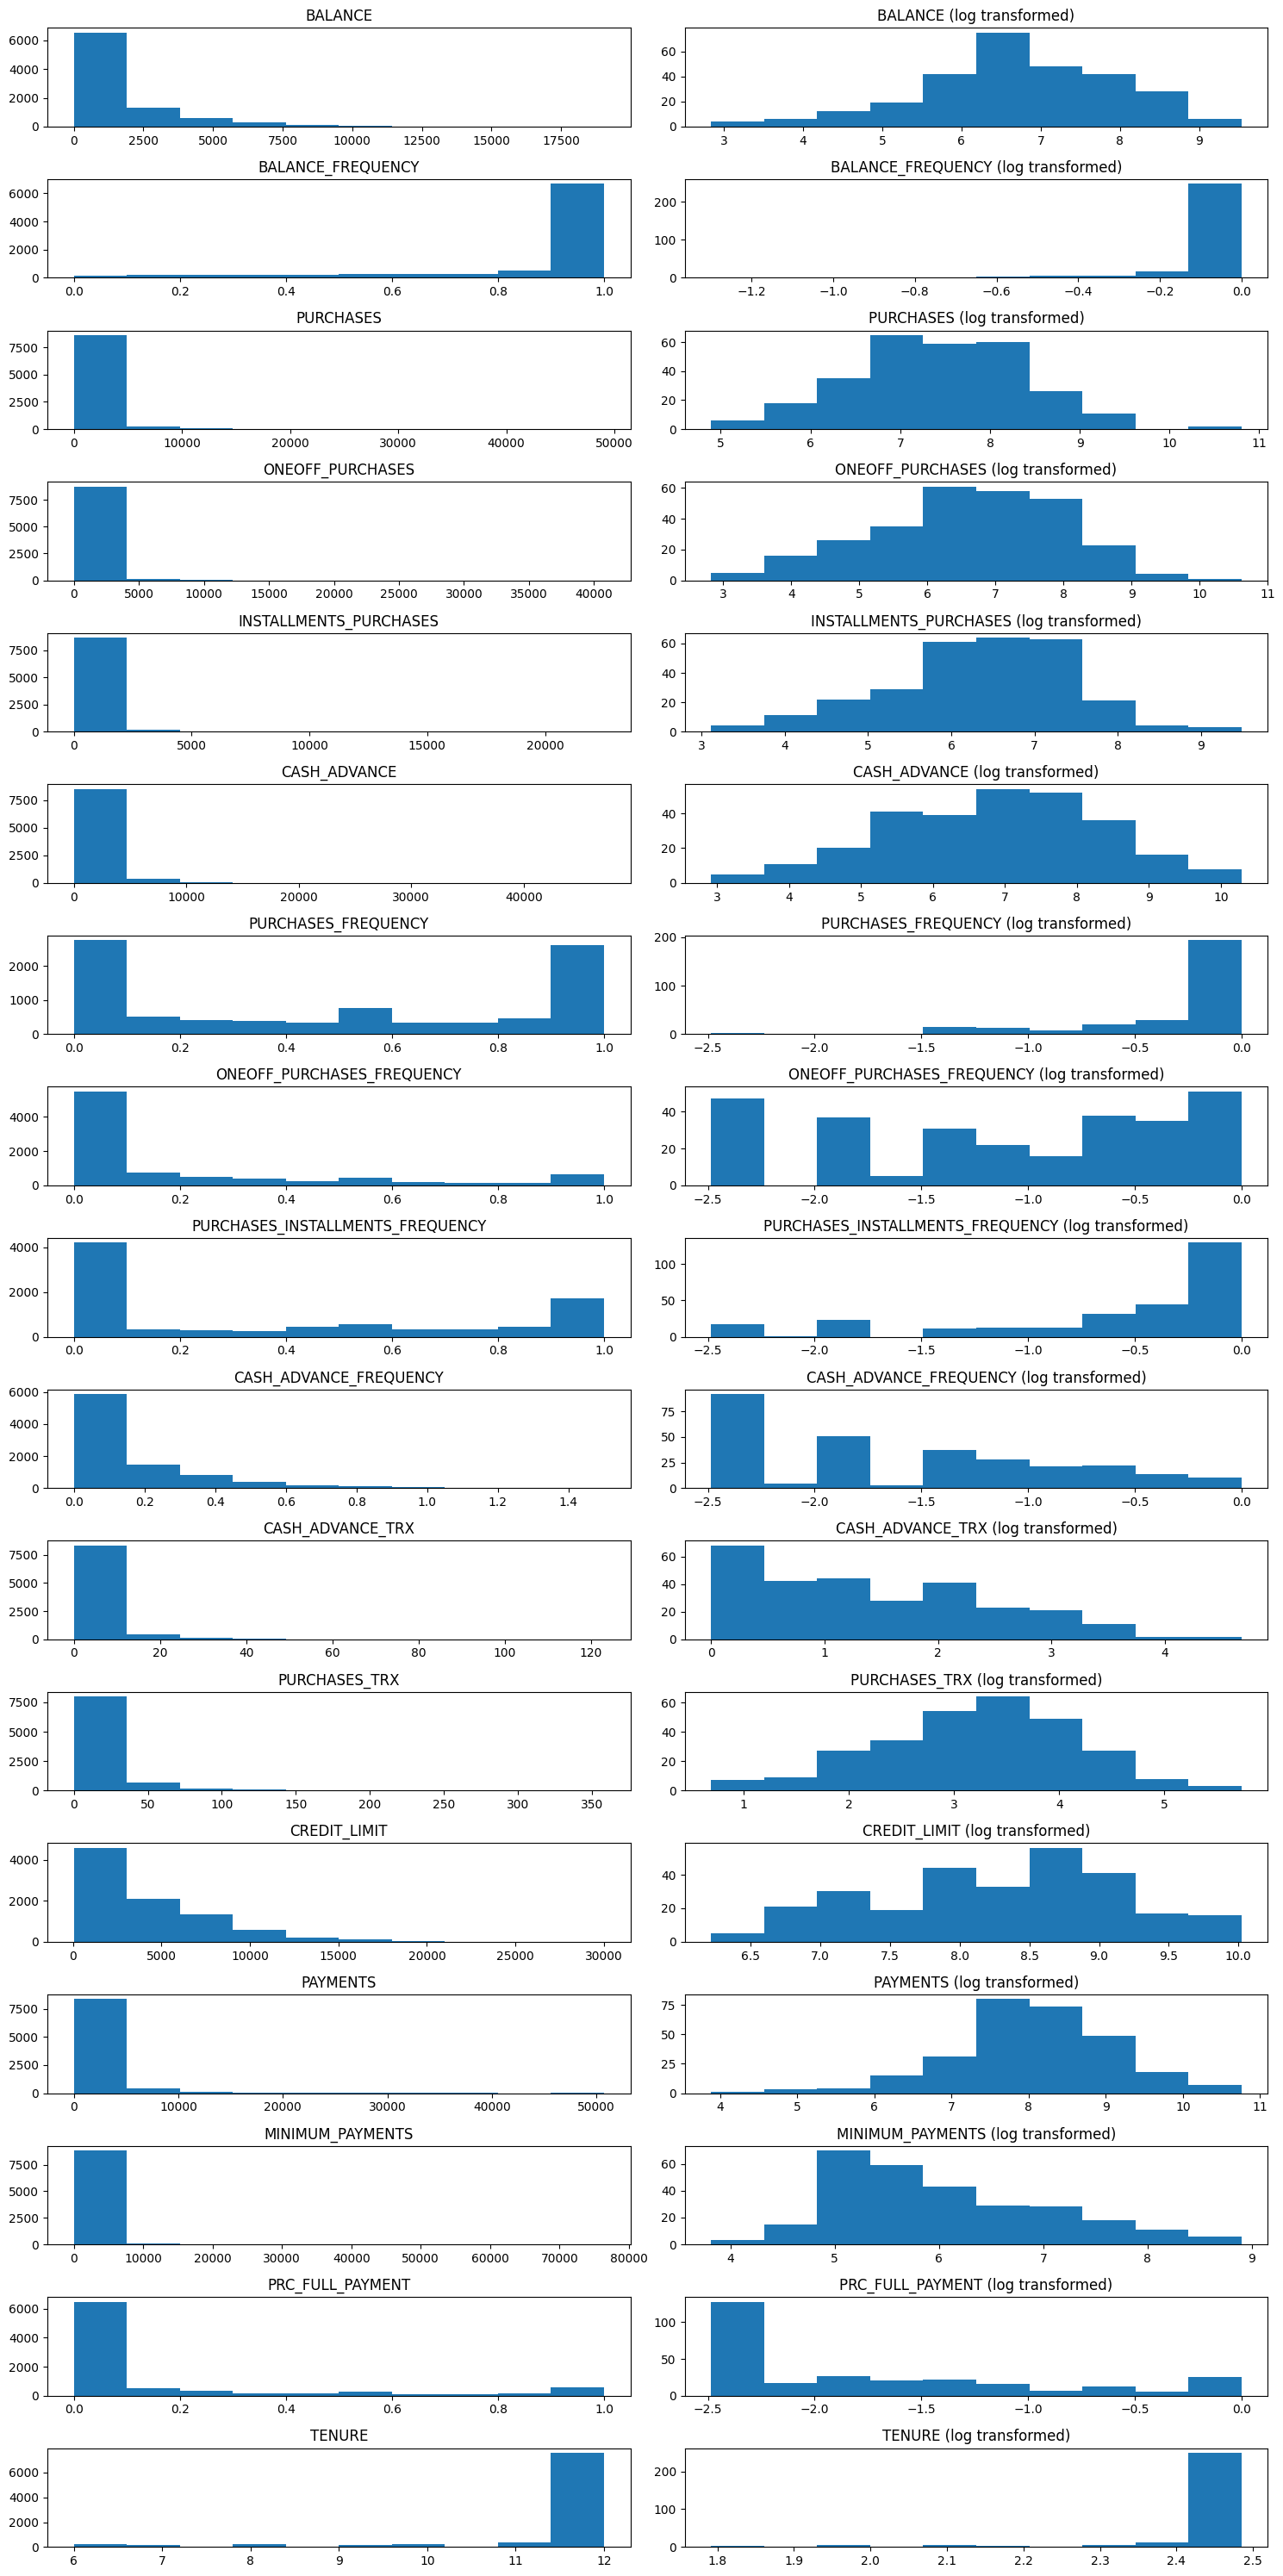

In [18]:
# All the variables are skewed to the right. We will apply log transformation to reduce the skewness.

# Dropping zero values,it would affect interpretation of the data but it is necessary to apply log transformation.
# for initial analysis
dfnozero = df.replace(0, np.nan).dropna()

df_log = dfnozero.apply(np.log)
fig, axs = plt.subplots(len(df_log.columns), ncols=2, figsize=(15, 30))

for i, col in enumerate(df_log.columns):
    axs[i, 0].hist(df[col])
    axs[i, 0].set_title(col)
    
    axs[i, 1].hist(df_log[col])
    axs[i, 1].set_title(col+" (log transformed)")

plt.tight_layout()
plt.show()

When data is sparse (i.e., contains a lot of zeros), certain clustering algorithms can perform better. Here are three that are often used for sparse data:

1. **K-Means**: Despite its simplicity, K-Means can still be a good choice for sparse data, especially if the data is high-dimensional. However, K-Means can be sensitive to the initialization of the centroids and the number of clusters needs to be specified in advance.

2. **DBSCAN**: DBSCAN is a density-based clustering algorithm that can discover clusters of arbitrary shape, which can be an advantage with sparse data. It also doesn't require specifying the number of clusters in advance. However, it can struggle with clusters of varying density.

3. **Hierarchical Clustering**: Hierarchical clustering doesn't require the number of clusters to be specified in advance and can provide a hierarchy of clusters, which can be useful for understanding the structure of the data. However, it can be computationally expensive for large datasets.

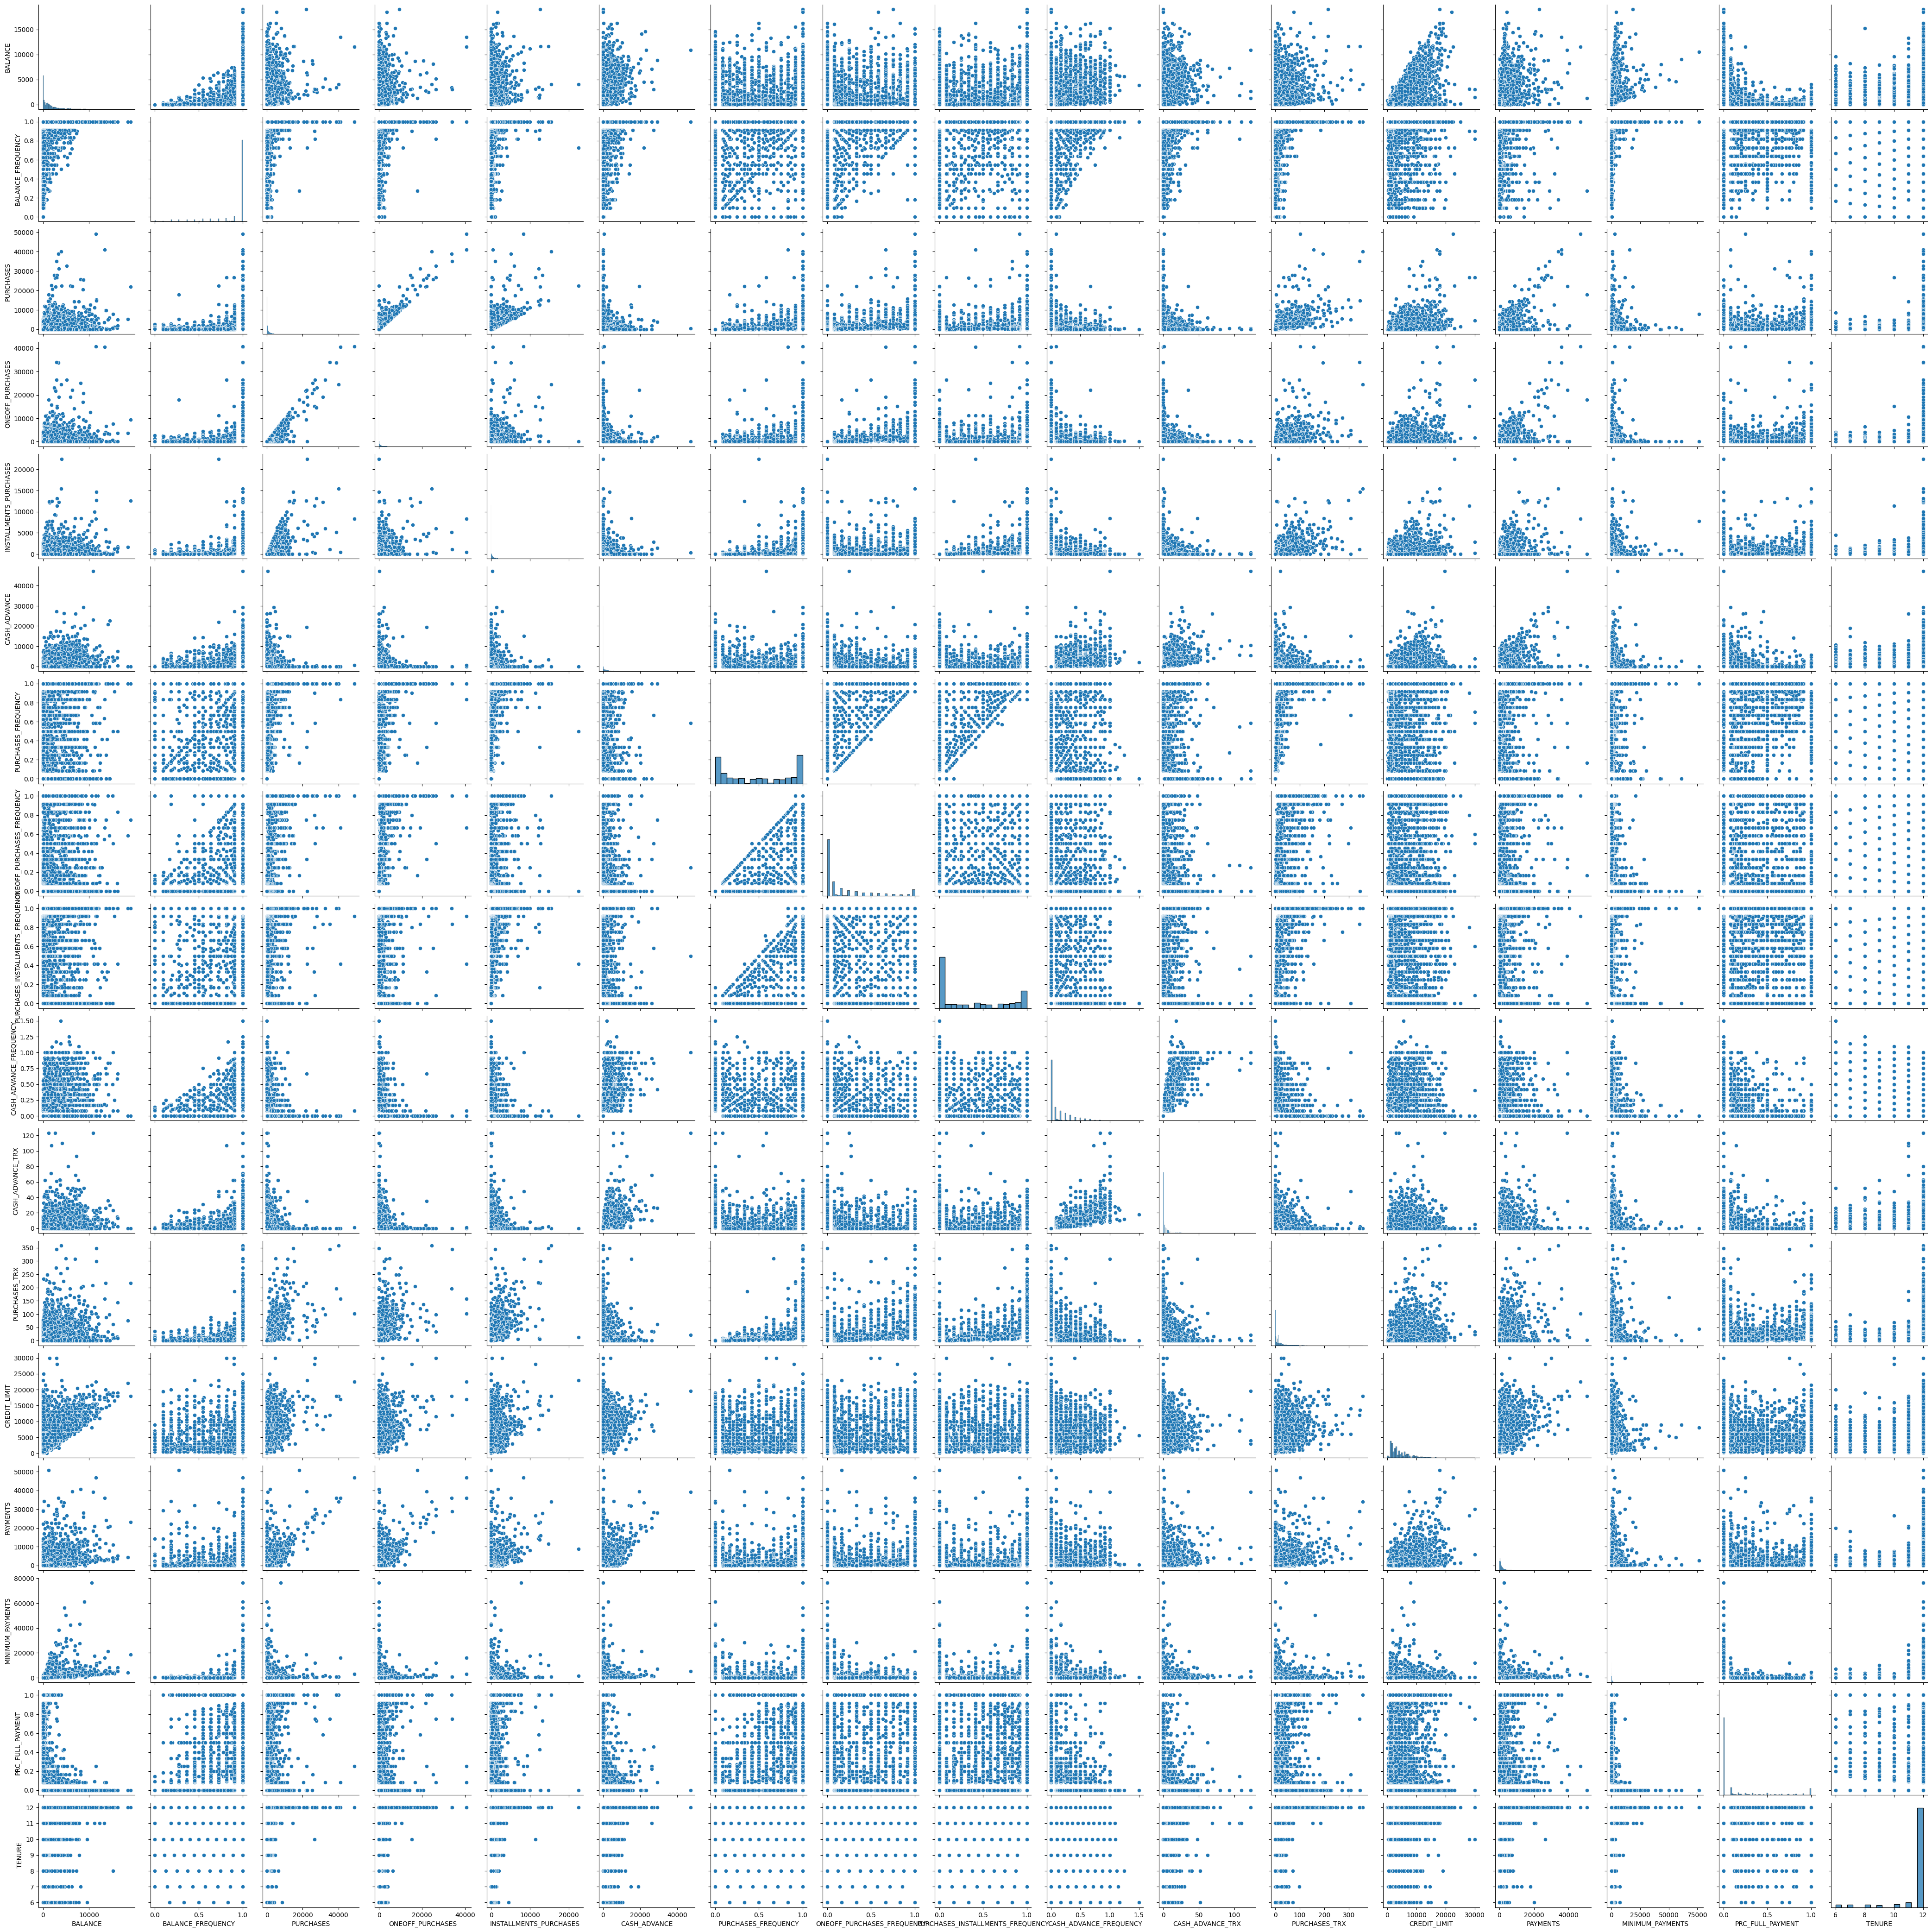

In [19]:
%matplotlib inline

#pairplot
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

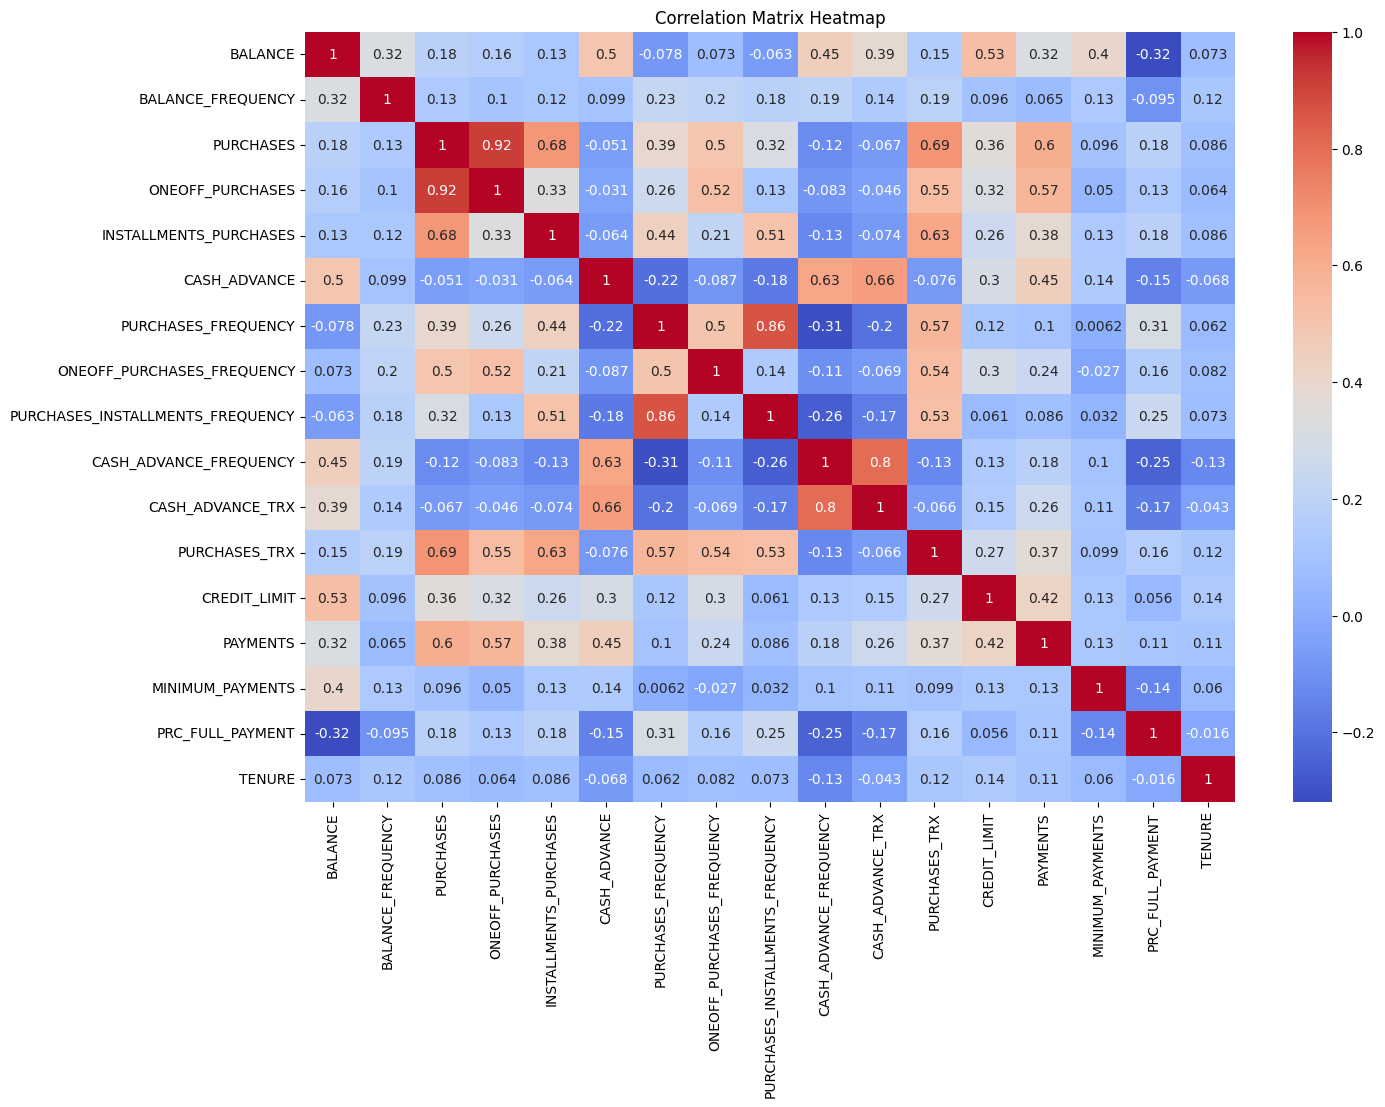

In [20]:
#correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

In [21]:
# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Get the columns with the highest correlations
highest_corr_columns = abs_corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)

# Print the columns with the highest correlations
print(highest_corr_columns)

BALANCE                           BALANCE                   1.000000
PURCHASES                         ONEOFF_PURCHASES          0.916845
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY       0.862934
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY    0.799561
PURCHASES_TRX                     PURCHASES                 0.689561
PURCHASES                         INSTALLMENTS_PURCHASES    0.679896
CASH_ADVANCE_TRX                  CASH_ADVANCE              0.656498
CASH_ADVANCE                      CASH_ADVANCE_FREQUENCY    0.628522
PURCHASES_TRX                     INSTALLMENTS_PURCHASES    0.628108
PAYMENTS                          PURCHASES                 0.603264
dtype: float64


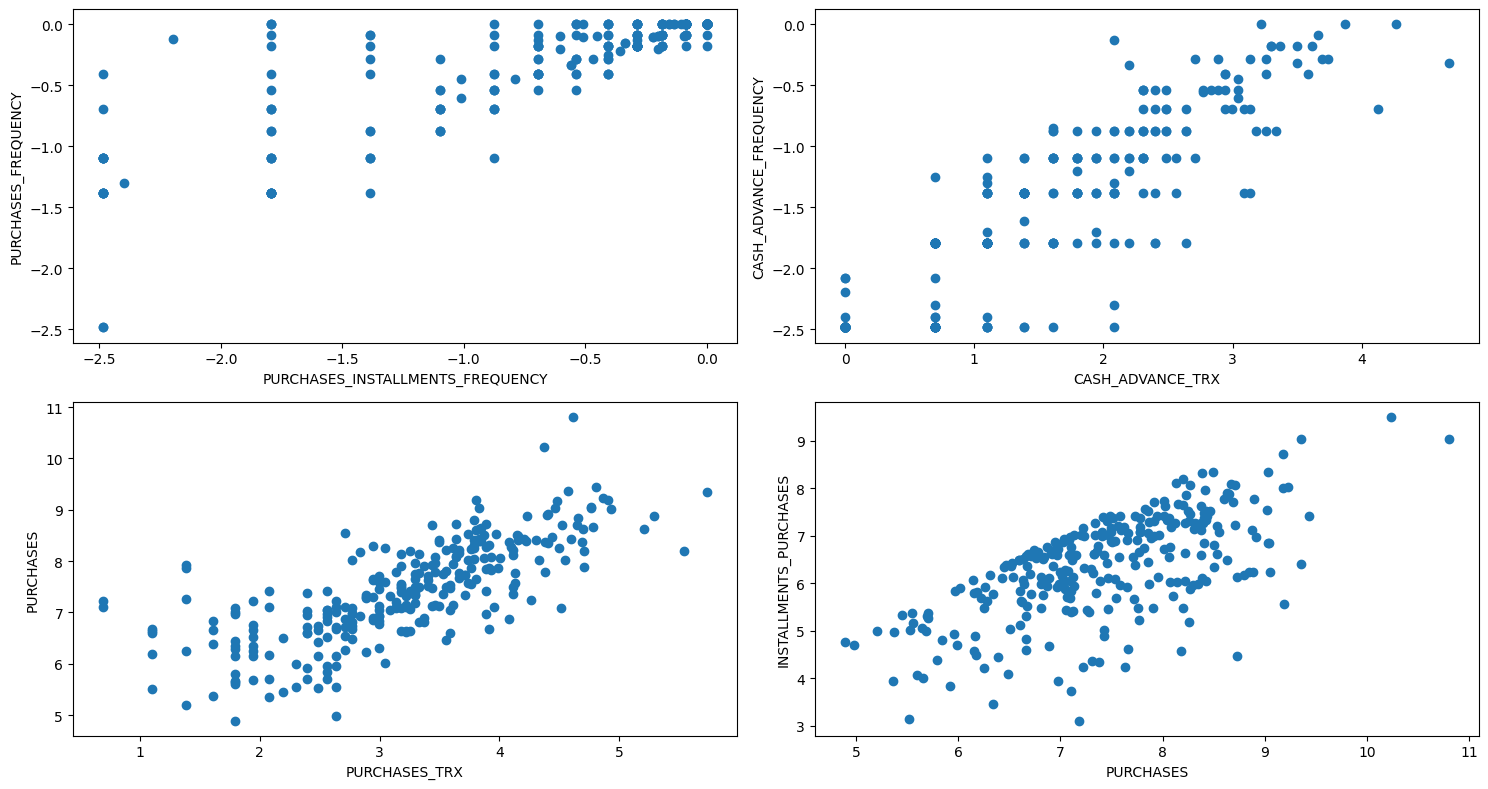

In [22]:
# Convert the highest_corr_columns Series to a list
highest_corr_columns_list = highest_corr_columns.index.tolist()

import matplotlib.pyplot as plt

# Create a subplot with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# Iterate over the highest correlated columns list
for i in range(2, 6):
    # Calculate the row and column index for the subplot
    row = (i - 2) // 2
    col = (i - 2) % 2
    
    # Plot the scatterplot for the current pair of columns
    axs[row, col].scatter(df_log[highest_corr_columns_list[i][0]], df_log[highest_corr_columns_list[i][1]])
    axs[row, col].set_xlabel(highest_corr_columns_list[i][0])
    axs[row, col].set_ylabel(highest_corr_columns_list[i][1])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In this Jupyter Notebook, I have chosen not to make any imputations to the zeroes in the data, as they have a specific meaning in the context of the data. Zero values can provide valuable information and should not be treated as missing values. Therefore, I have decided to keep the zeroes as they are without any imputations.

## Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standard scale the dataframe
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [24]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

def clustering_metrics(x, y):
    # Calculate the Davies-Bouldin index
    db_index = davies_bouldin_score(x, y)
    
    # Calculate the silhouette score
    silhouette = silhouette_score(x, y)
    
    # Calculate the Calinski-Harabasz index
    ch_index = calinski_harabasz_score(x, y)
    
    # Define the titles for each score
    out = {
        'Davies-Bouldin Index': db_index,
        'Silhouette Score': silhouette,
        'Calinski-Harabasz Index': ch_index
    }
    
    return out


The Hopkins test is a statistical test used to assess the clustering tendency of a dataset. It measures the degree of clustering in a dataset by comparing the distances between randomly selected points to the distances between the nearest neighbors of those points. The Hopkins statistic ranges from 0 to 1, where a value close to 1 indicates a high clustering tendency, and a value close to 0 indicates a random distribution of points. The Hopkins test is commonly used in data mining and clustering analysis to determine if a dataset is suitable for clustering algorithms.

In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):
        print("Unable to calculate Hopkins statistic.")
    else:
        print("Hopkins statistic:", H)

# Call the hopkins function on the df_scaled dataframe
hopkins(df_scaled)


Hopkins statistic: 0.9671912803298259


## Modeling

### Dimensionality reduction using PCA

PCA stands for Principal Component Analysis. It is a dimensionality reduction technique used in machine learning and data analysis. PCA transforms a dataset with a large number of variables into a smaller set of uncorrelated variables called principal components. These principal components capture the maximum amount of information from the original dataset while minimizing the loss of information.

PCA works by finding the directions in which the data varies the most and projecting the data onto these directions. The first principal component captures the most variation in the data, followed by the second principal component, and so on. Each principal component is a linear combination of the original variables.

PCA is commonly used for data visualization, feature extraction, and noise reduction. It helps in identifying patterns and relationships in high-dimensional data and can be used as a preprocessing step before applying machine learning algorithms.

In [26]:
# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the df dataframe
df_pca = pca.fit_transform(df)

# Convert the transformed array back to a dataframe
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
# Display the transformed dataframe
df_pca.head()


PC1          PC2
0 -4324.002588   915.765369
1  4121.337598 -2437.924095
2  1499.292482 -2001.757145
3  1321.831643 -1387.720046
4 -3740.724727   751.733688

### K-means

K-means clustering is a popular unsupervised machine learning algorithm used for clustering analysis. It aims to partition a dataset into K distinct clusters, where each data point belongs to the cluster with the nearest mean (centroid). 

The algorithm works as follows:
1. Randomly initialize K centroids.
2. Assign each data point to the nearest centroid based on the Euclidean distance.
3. Recalculate the centroids as the mean of all data points assigned to each cluster.
4. Repeat steps 2 and 3 until convergence (when the centroids no longer change significantly).

K-means clustering is an iterative algorithm that seeks to minimize the within-cluster sum of squares (WCSS), which measures the compactness of the clusters. It is important to note that the algorithm may converge to a local minimum, so it is common to run it multiple times with different initializations to improve the chances of finding a good solution.

K-means clustering is widely used in various fields, such as customer segmentation, image compression, anomaly detection, and recommendation systems. It provides a simple and efficient way to group similar data points together based on their features.

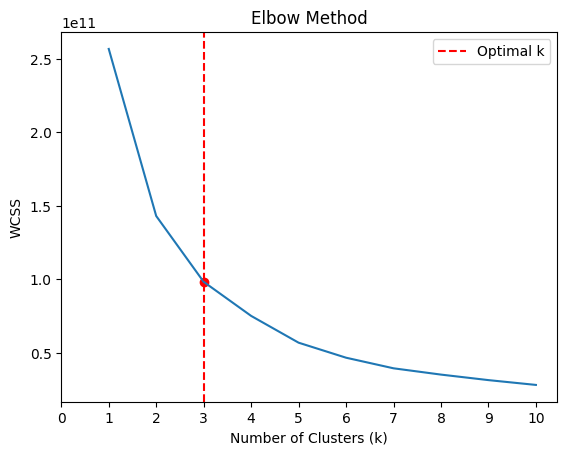

In [27]:
# Create a list to store the WCSS values for each k value
wcss = []

# Define the range of k values to iterate over
k_values = range(1, 11)

# Iterate over each k value
for k in k_values:
    # Create a KMeans object with the current k value
    kmeans = KMeans(n_clusters=k,n_init=10)
    
    # Fit the KMeans model to the df_pca dataframe
    kmeans.fit(df_pca)
    
    # Calculate the WCSS for the current k value
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the k values
plt.plot(k_values, wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Find the optimal k value
optimal_k = 3  # after evaluating the elbow method

# Add a line at the optimal k value
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal k') # after evaluating the elbow method

# Add small circle points to the elbow line
plt.scatter(optimal_k, wcss[optimal_k-1], color='r', marker='o') # after evaluating the elbow method

# Set the x-axis bins from 0 to 10 on intervals of 1
plt.xticks(range(0, 11, 1))




plt.legend()
plt.show()


In [28]:
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=42)

# Fit the KMeans model to the df_pca dataframe
kmeans.fit(df_pca)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster labels
print(cluster_labels)


[0 2 2 ... 0 0 0]


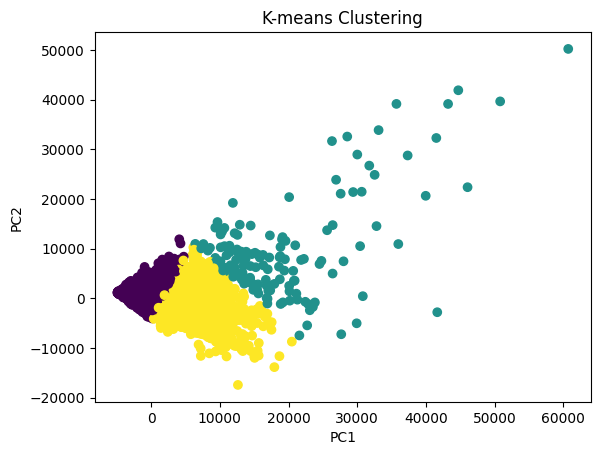

In [29]:
# Scatter plot the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()



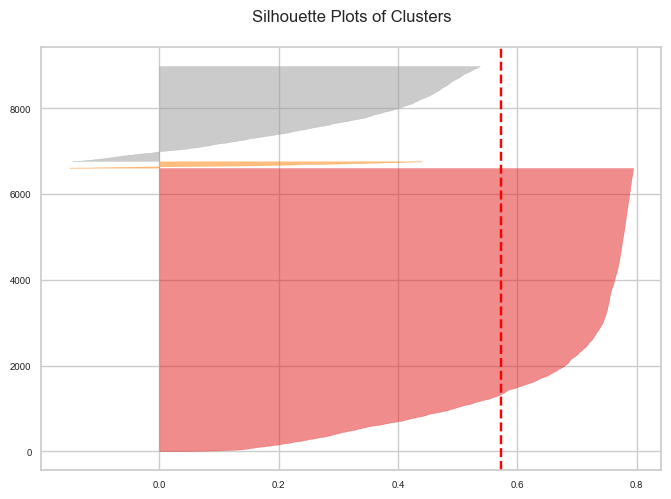

In [30]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=42)

s_viz = SilhouetteVisualizer(kmeans)
s_viz.fit(df_pca)
s_viz.ax.set_title('Silhouette Plots of Clusters\n')
s_viz.ax.tick_params(labelsize=7)

In [31]:
metrics_kmeans =clustering_metrics(df_pca, cluster_labels)
db_index_kmeans =metrics_kmeans['Davies-Bouldin Index']
silhouette_kmeans =metrics_kmeans['Silhouette Score']
ch_index_kmeans =metrics_kmeans['Calinski-Harabasz Index']

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an alternative to K-means. It doesn't require the user to set the number of clusters a priori, making it useful for situations where you don't know how many clusters to expect in your data.

DBSCAN works by defining a cluster as a maximal set of density-connected points. It has two main parameters:

1. `eps`: The maximum distance between two samples for them to be considered as in the same neighborhood.
2. `min_samples`: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

DBSCAN starts by exploring a random point in the dataset, and if there are at least `min_samples` points within a radius of `eps` from that point, a new cluster is created. The algorithm then iteratively adds all points within a distance of `eps` from any point in the cluster that have at least `min_samples` points in their own `eps` neighborhood. This process continues until no more points can be added to the cluster, at which point a new unvisited point is selected and the process repeats.

One of the advantages of DBSCAN is that it can find arbitrarily shaped clusters. It can also identify points that are not part of any cluster, which are classified as noise. However, it can struggle with data where the density varies significantly, as it uses a fixed `eps` value for all points.

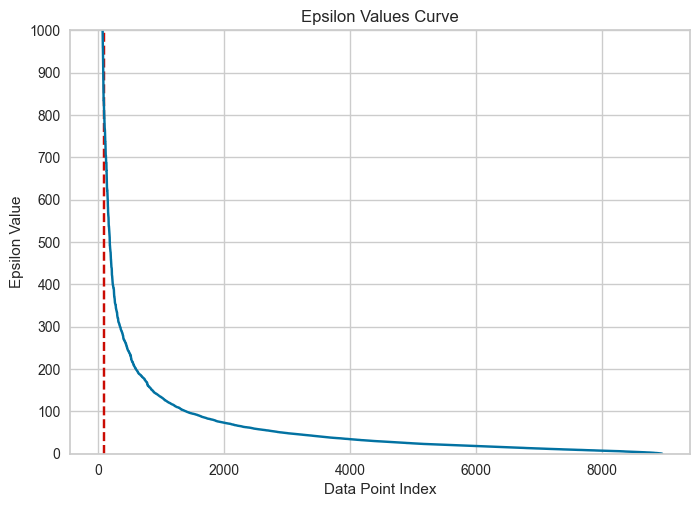

In [32]:
# Create a NearestNeighbors object
nn = NearestNeighbors(n_neighbors=2)

# Fit the NearestNeighbors model to the df_pca dataframe
nn.fit(df_pca)

# Calculate the distances to the nearest neighbors
distances, _ = nn.kneighbors(df_pca)

# Sort the distances in descending order
distances = sorted(distances[:, 1], reverse=True)

knee_locator = KneeLocator(range(len(distances)), distances, curve='convex', direction='decreasing')
knee_point = knee_locator.knee

plt.axvline(x=knee_point, color='r', linestyle='--')

# Plot the epsilon values curve
plt.plot(range(len(distances)), distances)
plt.xlabel('Data Point Index')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Values Curve')
plt.yticks(range(0, 1001, 100))
plt.ylim(0, 1000)
plt.show()


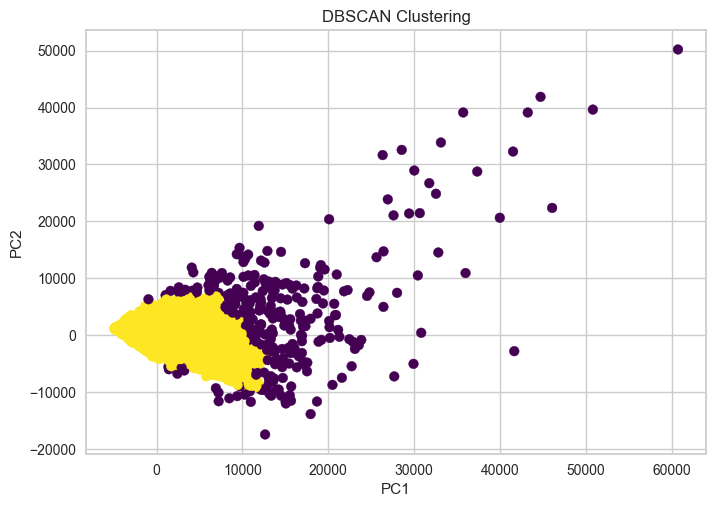

In [33]:
# Create a DBSCAN object
dbscan = DBSCAN(eps=800, min_samples=10)

# Fit the DBSCAN model to the df_pca dataframe
dbscan.fit(df_pca)

# Get the cluster labels for each data point
cluster_labels = dbscan.labels_

# Plot the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show()


In [34]:
metrics_dbscan = clustering_metrics(df_pca, cluster_labels)
db_index_dbscan = metrics_dbscan['Davies-Bouldin Index']
silhouette_dbscan = metrics_dbscan['Silhouette Score']
ch_index_dbscan = metrics_dbscan['Calinski-Harabasz Index']

### Hierarchical Clustering

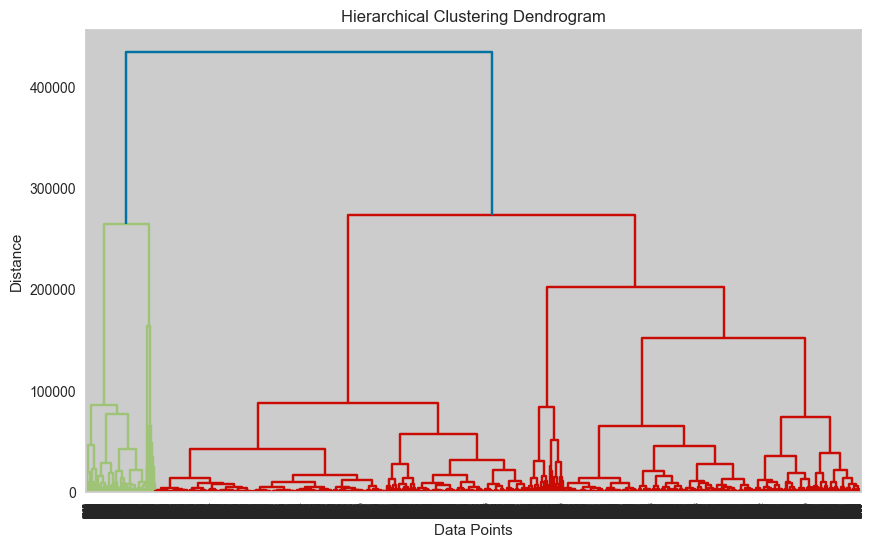

In [35]:
# Perform hierarchical clustering
Z = linkage(df_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


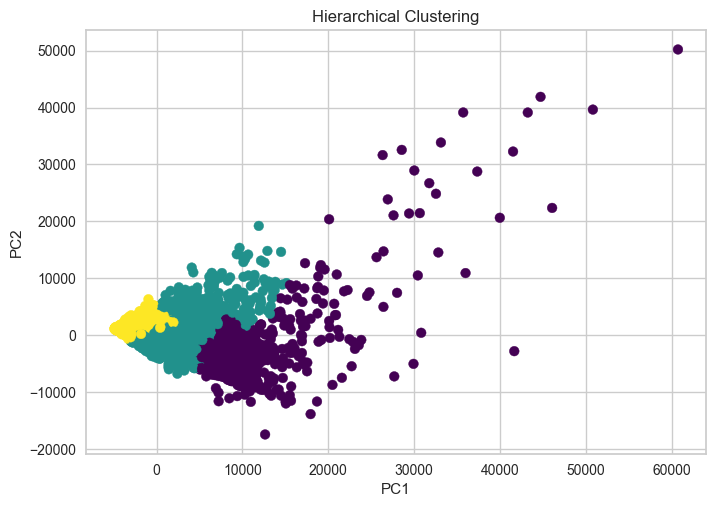

In [36]:
# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the AgglomerativeClustering model to the df_pca dataframe
cluster_labels = agg_clustering.fit_predict(df_pca)

# Plot the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering')
plt.show()


In [37]:
metrics_hierarchical = clustering_metrics(df_pca, cluster_labels)
db_index_hierarchical = metrics_hierarchical['Davies-Bouldin Index']
silhouette_hierarchical = metrics_hierarchical['Silhouette Score']
ch_index_hierarchical = metrics_hierarchical['Calinski-Harabasz Index']

### Comparing scores and choosing best model

In [38]:
# Create a dictionary to store the model names and metric scores
model_scores = {
    'Model': ['K-means', 'DBSCAN', 'Hierarchical'],
    'Davies-Bouldin Index': [db_index_kmeans, db_index_dbscan, db_index_hierarchical],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan, silhouette_hierarchical],
    'Calinski-Harabasz Index': [ch_index_kmeans, ch_index_dbscan, ch_index_hierarchical]
}

# Create a dataframe from the model_scores dictionary
df_scores = pd.DataFrame(model_scores)

# Display the dataframe
df_scores


Model  Davies-Bouldin Index  Silhouette Score  \
0       K-means              0.778089          0.572187   
1        DBSCAN              0.840878          0.722664   
2  Hierarchical              0.964190          0.381194   

   Calinski-Harabasz Index  
0              7207.475785  
1              3504.033978  
2              4701.069275

For dense, sparse data with a low number of clusters, DBSCAN is often a good choice because it can find arbitrary shaped clusters and handle noise, which is common in sparse data. However, the choice of the best model also depends on the specific metrics:

1. **Davies-Bouldin Index (dbi)**: Lower is better. According to the results, Hierarchical Clustering performs best on this metric.

2. **Silhouette Score (sil)**: Higher is better, indicating that data points are more similar to their own cluster than to others. DBSCAN performs best on this metric in the results.

3. **Calinski-Harabasz Index (ch)**: Higher is better, indicating dense and well-separated clusters. K-Means performs best on this metric in the results.

In this case, there's not a single model that performs best on all metrics. I need to decide which metric is most important for my specific use case. If the ability to handle noise and find arbitrary shaped clusters is important, DBSCAN might be the best choice despite its lower performance on the CH index. If the compactness of the clusters is more important, K-Means might be the best choice.

Given the meaningful nature of zeroes in the dataset and their non-error status, And with the metrics comparison between the 3 models taken in consideration, I've opted for **K-means** as the clustering model. Despite its known limitations with zero-rich data,I find it more fitting for our context compared to other metrics. This decision considers the unique characteristics of our dataset, balancing K-means' challenges with its overall suitability.


A plan of action to revisit this analysis with additional data or different modeling techniques?
- I intend to keep the model and try to improve my k-means through any of the following methods which would be found fitting:

    Feature Scaling, 
Feature Selection, 
Data Transformation, 
Outlier Removal, 
Optimal K Selection, 
Initialization Methods, 
Multiple Initializations, 
Use of Distance Metrics, 
Parallelization.

## Profiling

In [39]:
#Add K-Means Prediction to Data Frame
y_kmeans = kmeans.fit_predict(df_pca)
df['cluster_result'] = y_kmeans+1
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

#Calculationg Overall Mean from Current Data Frame
df_profile_overall = pd.DataFrame()

df_profile_overall['Overall'] = df.describe().loc[['mean']].T

#Summarize Mean of Each Clusters
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})

df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

#Combining Both Data Frame
print('Summary of Each Cluster')

df_profile = df_cluster_summary.join(df_profile_overall)

df_profile.style.background_gradient()

Summary of Each Cluster


Based on the provided table, which shows the mean values of different financial behaviors across three customer clusters, we can infer the following insights about each customer segment:

**Cluster 1:**

Lower Balance: Customers have the lowest average balance compared to the other clusters.

Moderate Purchasing Behavior: Their purchases are moderate, both in terms of one-off and installment purchases.

Lower Credit Limit: They have the lowest average credit limit, which could be indicative of lower creditworthiness or a newer customer base.

Higher Full Payment Rate: The proportion of full payment is higher, suggesting these customers may be more conscientious about paying off balances.

**Cluster 2:**

High Balance and Credit Limit: These customers have a high average balance and the highest credit limit, indicating they are likely more affluent or trusted customers.
High Purchase Activity: This segment shows significantly higher one-off purchases, suggesting these customers may engage in larger, less frequent purchases.
High Payments: They make the highest payments on average, which is consistent with their high credit limit and high balance.
Moderate to High Purchasing Frequency: Purchase frequency is moderate to high, with a particular affinity for installment purchases, implying comfort with regular, possibly planned spending.

**Cluster 3:**

Moderate Balance with Lower Cash Advances: Customers have a moderate balance and take the least cash advances, suggesting they may use their credit card more judiciously.
Lowest Purchase Activity: This group has the lowest average for both one-off and installment purchases, which could suggest a more savings-oriented mindset or a preference for using other payment methods.
Moderate Credit Limit: Their credit limit is higher than Cluster 1 but significantly lower than Cluster 2, indicating a middle-ground in terms of creditworthiness.
Lowest Full Payment Rate: They have the lowest rate of full payments, which may indicate a tendency to carry a balance or potentially struggle with full payments.

**General Observations:**

Tenure: All clusters have a similar average tenure, suggesting that the length of time as a customer may not be a distinguishing factor in their credit card usage behaviors.

Cash Advance Usage: Cluster 1 and Cluster 2 take more cash advances than Cluster 3, yet Cluster 2 seems to have a much higher frequency of cash advances. This could correlate with their high balance and credit limits, indicating that they may be using cash advances in a strategic financial manner.

Payment Behavior: Clusters 1 and 2 have higher payments relative to their balances, which might suggest better financial health or a more aggressive payment strategy to avoid interest.

**Caution:**

It is important to note that these insights are purely based on averages and do not account for the distribution within each cluster. Outliers or varying distributions can significantly affect the interpretation.